In [20]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn import svm

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.datasets import load_digits

from sklearn.inspection import DecisionBoundaryDisplay


import seaborn as sns

import pandas as pd

In [2]:
## Load sample data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


# PCA

In [6]:
## Get access to a step in Pipeline
pca["pca"]

PCA(n_components=2, random_state=1)

         pc_1      pc_2  label
0   -2.264703  0.480027      0
1   -2.080961 -0.674134      0
2   -2.364229 -0.341908      0
3   -2.299384 -0.597395      0
4   -2.389842  0.646835      0
..        ...       ...    ...
145  1.870503  0.386966      2
146  1.564580 -0.896687      2
147  1.521170  0.269069      2
148  1.372788  1.011254      2
149  0.960656 -0.024332      2

[150 rows x 3 columns]


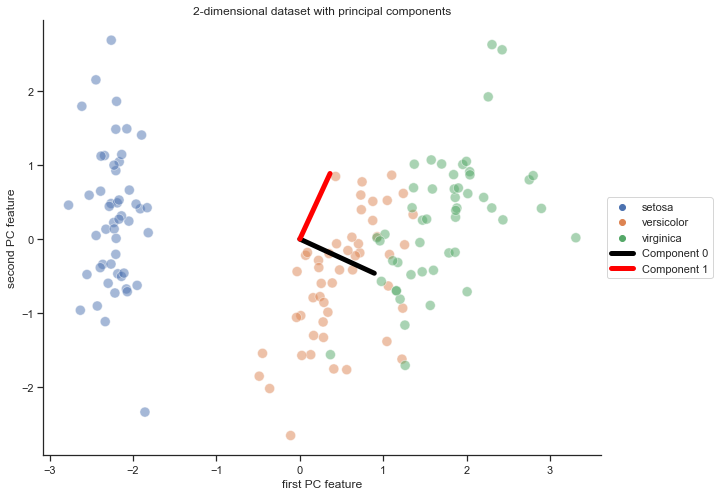

explained variance ratio (first two components): [0.72962445 0.22850762]


([<matplotlib.axis.XTick at 0x7fe518f469a0>,
 [Text(0, 0, ''), Text(0, 0, '')])

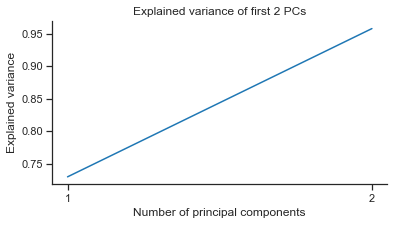

In [8]:
n_comp = 2

#pca = PCA(n_components=n_comp, random_state = 1)
#X_fit = pca.fit_transform(X)

pca = make_pipeline(StandardScaler(), PCA(n_components=n_comp, random_state = 1))

X_fit = pca.fit_transform(X)

X_fit_df = pd.DataFrame({"pc_1": X_fit[:,0], "pc_2": X_fit[:,1], "label": y})

print(X_fit_df)

## Plot PCA on 2D plane

def plot_PCA_2d(X_fitted):
    """Plot PCA results"""
    plt.figure(figsize =(10, 8))

    X_fitted['class_label'] = X_fitted['label'].map({0: "setosa", 1: "versicolor", 2:"virginica"})

    hue_order = ["setosa", "versicolor", "virginica"]
    
    sns.set_context("notebook")
    sns.set_style("ticks")
    sns.scatterplot(data=X_fitted, 
                    x="pc_1", 
                    y="pc_2", 
                    hue="class_label",
                    palette="deep",
                    hue_order = hue_order,
                    legend=True,
                    s = 100,
                    alpha = 0.5)
    sns.despine()
    
    ## Show loadings on the principle components
    pc_colors = ["black", "red"]
    for i, (comp, var, pc_color) in enumerate(zip(pca["pca"].components_, pca["pca"].explained_variance_, pc_colors)):
        comp = comp * np.sqrt(var)  # scale component by its variance explanation power (i.e., Loading)
        plt.plot(
            [0, comp[0]],
            [0, comp[1]],
            label=f"Component {i}",
            linewidth=5,
            color=pc_color,
        )
    plt.gca().set(
        #aspect="equal",
        title="2-dimensional dataset with principal components",
        xlabel="first PC feature",
        ylabel="second PC feature",
    )
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
# Plot 2D dataset with principal components   
plot_PCA_2d(X_fit_df)


## Percentage of variance explained for each components
explained_variances = pca["pca"].explained_variance_ratio_
print(
    "explained variance ratio (first two components): %s"
    % str(explained_variances)
)

## Plot cumulative explained variance by first 'n' principle components
explained_variances_cum = np.cumsum(pca["pca"].explained_variance_ratio_)
pc_df = pd.DataFrame(data = {'n_comp':list(range(1, n_comp+1)), 
                             'exp_var': explained_variances,
                             'exp_var_cum': explained_variances_cum})


plt.figure(figsize =(6, 3))
sns.lineplot(data=pc_df, x="n_comp", y="exp_var_cum")
sns.despine()
plt.title("Explained variance of first %s PCs" % str(n_comp))
plt.xlabel("Number of principal components")
plt.ylabel("Explained variance")
plt.xticks(np.arange(1, n_comp+1, step=1))

# Plot decision boundary from SVM

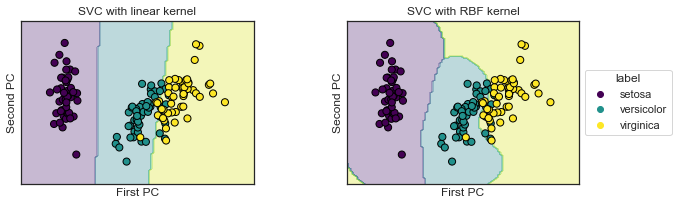

In [55]:
C = 1.0  # SVM regularization parameter

svm_models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
)

## Fit SVM on data after PCA
svm_models = (clf.fit(X_fit, y) for clf in svm_models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
)

# Set-up 2x2 grid for decision boundary plots
fig, sub = plt.subplots(1, 2, figsize=(10, 3))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_fit[:, 0], X_fit[:, 1]

for clf, title, ax in zip(svm_models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_fit,
        response_method="predict",
        cmap='viridis',
        alpha=0.3,
        ax=ax,
        xlabel="First PC",
        ylabel="Second PC",
    )
    plot = ax.scatter(X0, X1, c=y, cmap='viridis', s=50, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    #plt.legend(*plot.legend_elements(), loc='center left', title="label", bbox_to_anchor=(1, 0.5))
    plt.legend(handles=plot.legend_elements()[0],  title="label",
               loc='center left',  bbox_to_anchor=(1, 0.5), labels = ["setosa", "versicolor", "virginica"])

plt.show()


# t-SNE

In [13]:
## Load MNIST data
digits = load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
digit_label = digits.target

In [14]:
## Initialize tSNE object
perplexity = 50
tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300, random_state = 1)
tsne_results = tsne.fit_transform(data)

tsne_df = pd.DataFrame({"feature_1":tsne_results[:,0], "feature_2":tsne_results[:,1], "class_label":digit_label})


/Users/chenxiliao/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/chenxiliao/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 13.138928
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.252579
[t-SNE] KL divergence after 300 iterations: 0.851951


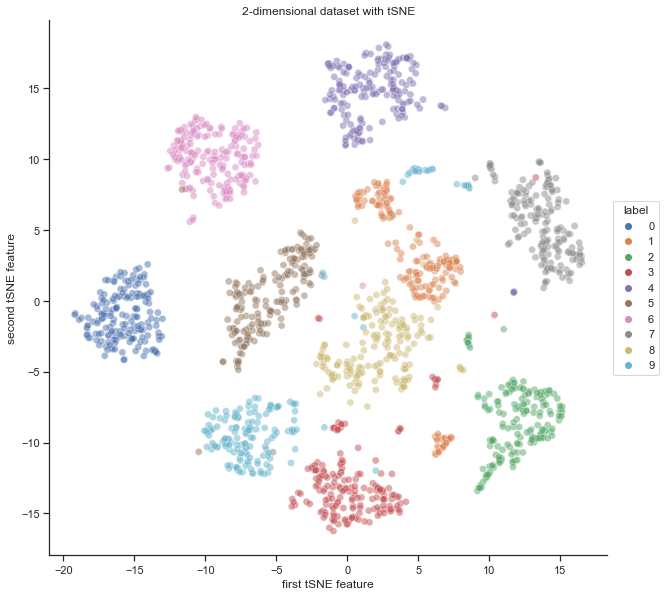

In [85]:
def plot_tSNE(X_fitted):
    """Plot tSNE results"""
    
    hue_order = list(range(10))
    
    plt.figure(figsize =(10, 10))
    
    sns.set_context("notebook")
    sns.set_style("ticks")
    sns.scatterplot(data=X_fitted, 
                    x="feature_1", 
                    y="feature_2", 
                    hue="class_label",
                    palette="deep",
                    hue_order = hue_order,
                    legend=True,
                    s = 50,
                    alpha = 0.5)
    sns.despine()
    
    plt.gca().set(
        aspect="equal",
        title="2-dimensional dataset with tSNE",
        xlabel="first tSNE feature",
        ylabel="second tSNE feature",
    )
    
    plt.legend(loc='center left', title="label", bbox_to_anchor=(1, 0.5))
    plt.show()
     
plot_tSNE(tsne_df)